# Data exploration notebook


Investigate Mukis data for cities

## Research questions

**General data structure**
 - Check: same format in all files?
 - What are important columns?

**General statistics**
 - How many observations (per city and year)?
 - How many users?
 
**Observations by users**
 - How many observations per user on average?
 - Distribution of observations per user?
 
 
## Observations

**Data**
 - time_observed_at is best timestamp (converted to UTC)
 - Can absolute number of agreements/disagreements be used as metric for engagement/popularity?
 - "quality grade" Could be used to judge "quality" of users, as well as number of agreements vs. disagreements

**Data statistics**
 - Number of observations stayed the same, decrease in 2020
 - Number of users has increased steadily
 - Number of obs. per user has decreased steadily! (Except LA)
 - Contributions statistics:
 
**User statistics**
 - Top 50% of users contribute 97% of observations
 - Top 10% of users contribute 77% of observations
 - Top 1% of users contribute 41% of observations
 
## Next steps

 - Try out segmentation of user bases. Top 10% contributors? vs. one time contributers vs. rest?
 - Explore "user quality metric": Can quality_grade or agreements/disagreements be used?
 - Explore "user engagement metric": Can number of agreements/disagreements be used?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

#import niceplot
#niceplot.set_context('notex')
#from niceplot import strip_axis
#from niceplot.histograms import plot_histogram


#plt.rcParams('')
#import pyinaturalist

# Config

In [2]:
cities_years = {
    'London': [2018, 2019, 2020],
    'Los_Angeles': [2018, 2019, 2020],
    'San_Francisco': [2018, 2019, 2020],
}

import seaborn as sns
cities_colors = {
    'London': sns.color_palette("Blues", n_colors = 3),
    'Los_Angeles': sns.color_palette("Reds", n_colors = 4),
    'San_Francisco': sns.color_palette("Greens", n_colors = 4),
}

# Load data

In [3]:
from collections import defaultdict
dfs = defaultdict(dict)
dfall = []

for city, years in cities_years.items():
    for year in years:
        print("Loading: ", city, year)
        df = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\CNC_{}_{}.csv'.format(city, year))
        #df = pd.read_csv("../data/raw/observations/CNC {} {}.csv".format(city, year))
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['London'][2018].head()

Loading:  London 2018
Loading:  London 2019
Loading:  London 2020
Loading:  Los_Angeles 2018


C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Loading:  Los_Angeles 2019
Loading:  Los_Angeles 2020
Loading:  San_Francisco 2018
Loading:  San_Francisco 2019
Loading:  San_Francisco 2020


,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,...,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,11479007,2018-04-27 7:52:34 am BST,2018-04-27,2018-04-27 07:52:34 UTC,UTC,159021,muki,2018-04-27 07:06:17 UTC,2018-04-27 09:26:56 UTC,research,...,NaN,NaN,False,gps,gps,lesser celandine,Ficaria verna,lesser celandine,Plantae,204321.0
1,11480212,2018-04-27 8:39:41 am BST,2018-04-27,2018-04-27 07:39:41 UTC,London,664459,lucyrobinsonnhm,2018-04-27 08:02:52 UTC,2019-01-29 21:16:34 UTC,research,...,NaN,open,False,gps,gps,Pigeon biset domestique,Columba livia domestica,Feral Pigeon,Aves,122767.0
2,11480902,Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1),2018-04-27,2018-04-27 06:34:31 UTC,Amsterdam,908315,tess26,2018-04-27 08:42:01 UTC,2018-04-27 11:01:49 UTC,casual,...,NaN,NaN,False,NaN,NaN,NaN,Hyacinthoides hispanica,Spanish Bluebell,Plantae,57635.0
3,11481097,Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1),2018-04-27,2018-04-27 07:54:35 UTC,Amsterdam,796473,bryonycross,2018-04-27 08:54:45 UTC,2018-04-27 20:23:41 UTC,research,...,NaN,NaN,False,NaN,NaN,Green Alkanet,Pentaglottis sempervirens,Green Alkanet,Plantae,166466.0
4,11482247,2018-04-27 8:42:21 am BST,2018-04-27,2018-04-27 07:42:21 UTC,London,664459,lucyrobinsonnhm,2018-04-27 10:09:55 UTC,2018-04-27 15:37:31 UTC,research,...,NaN,NaN,False,gps,gps,London Plane,Platanus × hispanica,London Plane,Plantae,552449.0


# General data structure

Same format in all files?

-> Yes. All files have same number of columns and column names

In [4]:
columns_reference = dfs['London'][2018].columns
for city, dfscity in dfs.items():
    for year, df in dfscity.items():
        print("Shape: ", df.shape)
        print("Same columns?", set(df.columns) == set(columns_reference) )

Shape:  (2624, 34)
Same columns? True
Shape:  (5345, 34)
Same columns? True
Shape:  (5761, 34)
Same columns? True
Shape:  (19357, 34)
Same columns? True
Shape:  (34495, 34)
Same columns? True
Shape:  (19490, 34)
Same columns? True
Shape:  (43033, 34)
Same columns? True
Shape:  (40024, 34)
Same columns? True
Shape:  (31799, 34)
Same columns? True


## Important columns

**Interesting columns:**
 - time_observed_at
     - Time and date of observations *converted to UTC*
 - user_id
 - created_at? updated_at?
     - What is the difference to observed at?
 - quality_grade
     - Values are "research", "needs_id", "casual"
     - Meaning? Who sets this?
 - image_url, sound_url
 - description
 - num_identification_agreements / _disagreements
     - Measure of user interaction? Post and user? popularity?
 - spatial: place_guess, latitude, longitude
 - species, taxon, ... (maybe)
 
 
 
Questions:

In [5]:
pd.set_option('display.max_columns', 100)
dfs['London'][2018].head(10)

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,url,image_url,sound_url,tag_list,description,num_identification_agreements,num_identification_disagreements,captive_cultivated,oauth_application_id,place_guess,latitude,longitude,positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,11479007,2018-04-27 7:52:34 am BST,2018-04-27,2018-04-27 07:52:34 UTC,UTC,159021,muki,2018-04-27 07:06:17 UTC,2018-04-27 09:26:56 UTC,research,CC-BY,https://www.inaturalist.org/observations/11479007,https://static.inaturalist.org/photos/16383446...,NaN,NaN,NaN,4,0,False,2.0,"6-7 Griffin Cl, London, UK",51.550636,-0.228487,NaN,NaN,NaN,False,gps,gps,lesser celandine,Ficaria verna,lesser celandine,Plantae,204321.0
1,11480212,2018-04-27 8:39:41 am BST,2018-04-27,2018-04-27 07:39:41 UTC,London,664459,lucyrobinsonnhm,2018-04-27 08:02:52 UTC,2019-01-29 21:16:34 UTC,research,CC0,https://www.inaturalist.org/observations/11480212,https://static.inaturalist.org/photos/16385366...,NaN,NaN,NaN,4,0,False,2.0,"19 Exhibition Rd, Kensington, London SW7 2HE, UK",51.495277,-0.173611,NaN,NaN,open,False,gps,gps,Pigeon biset domestique,Columba livia domestica,Feral Pigeon,Aves,122767.0
2,11480902,Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1),2018-04-27,2018-04-27 06:34:31 UTC,Amsterdam,908315,tess26,2018-04-27 08:42:01 UTC,2018-04-27 11:01:49 UTC,casual,NaN,https://www.inaturalist.org/observations/11480902,https://static.inaturalist.org/photos/16386511...,NaN,NaN,NaN,0,0,True,3.0,"58 Shuttleworth Road, London, England, GB",51.472981,-0.169102,36848.0,NaN,NaN,False,NaN,NaN,NaN,Hyacinthoides hispanica,Spanish Bluebell,Plantae,57635.0
3,11481097,Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1),2018-04-27,2018-04-27 07:54:35 UTC,Amsterdam,796473,bryonycross,2018-04-27 08:54:45 UTC,2018-04-27 20:23:41 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/11481097,https://static.inaturalist.org/photos/16386823...,NaN,NaN,NaN,2,0,False,3.0,"Hyde Park, London, England, GB",51.508076,-0.161516,10.0,NaN,NaN,False,NaN,NaN,Green Alkanet,Pentaglottis sempervirens,Green Alkanet,Plantae,166466.0
4,11482247,2018-04-27 8:42:21 am BST,2018-04-27,2018-04-27 07:42:21 UTC,London,664459,lucyrobinsonnhm,2018-04-27 10:09:55 UTC,2018-04-27 15:37:31 UTC,research,CC0,https://www.inaturalist.org/observations/11482247,https://static.inaturalist.org/photos/16388939...,NaN,NaN,NaN,2,0,False,2.0,"19 Exhibition Rd, Kensington, London SW7 2HE, UK",51.496113,-0.173889,NaN,NaN,NaN,False,gps,gps,London Plane,Platanus × hispanica,London Plane,Plantae,552449.0
5,11482706,Fri Apr 27 2018 11:40:06 GMT+0100 (GMT+1),2018-04-27,2018-04-27 09:40:06 UTC,Amsterdam,796473,bryonycross,2018-04-27 10:40:31 UTC,2018-04-27 17:18:08 UTC,casual,CC-BY-NC,https://www.inaturalist.org/observations/11482706,https://static.inaturalist.org/photos/16389858...,NaN,NaN,NaN,0,0,True,3.0,"Hyde Park, London, England, GB",51.510506,-0.167576,10.0,NaN,NaN,False,NaN,NaN,NaN,Quercus stellata,post oak,Plantae,119269.0
6,11483083,Fri Apr 27 2018 12:01:15 GMT+0100 (GMT+1),2018-04-27,2018-04-27 10:01:15 UTC,Amsterdam,796473,bryonycross,2018-04-27 11:01:48 UTC,2018-04-27 17:18:09 UTC,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/11483083,https://static.inaturalist.org/photos/16390537...,NaN,NaN,NaN,0,0,False,3.0,"Hyde Park, London, England, GB",51.510771,-0.167933,10.0,NaN,NaN,False,NaN,NaN,NaN,Oligochaeta,Earthworms and allies,Animalia,333586.0
7,11484150,2018-04-27 10:45:59 AM GMT+01:00,2018-04-27,2018-04-27 08:45:59 UTC,Amsterdam,903018,abilila,2018-04-27 11:44:13 UTC,2018-04-27 11:44:13 UTC,casual,CC-BY-NC,https://www.inaturalist.org/observations/11484150,NaN,NaN,NaN,NaN,0,0,False,2.0,"22 Savernake Rd, London NW3 2JP, UK",51.555803,-0.157700,18.0,NaN,NaN,False,NaN,NaN,Pigeons and Doves,Columbiformes,Pigeons and Doves,Aves,2708.0
8,11484

In [6]:
df.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'user_id', 'user_login', 'created_at', 'updated_at',
       'quality_grade', 'license', 'url', 'image_url', 'sound_url', 'tag_list',
       'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy',
       'coordinates_obscured', 'positioning_method', 'positioning_device',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31799 entries, 0 to 31798
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31799 non-null  int64  
 1   observed_on_string                31799 non-null  object 
 2   observed_on                       31799 non-null  object 
 3   time_observed_at                  31010 non-null  object 
 4   time_zone                         31799 non-null  object 
 5   user_id                           31799 non-null  int64  
 6   user_login                        31799 non-null  object 
 7   created_at                        31799 non-null  object 
 8   updated_at                        31799 non-null  object 
 9   quality_grade                     31799 non-null  object 
 10  license                           23095 non-null  object 
 11  url                               31799 non-null  object 
 12  imag

# General statistics

## Number of observations per city per year

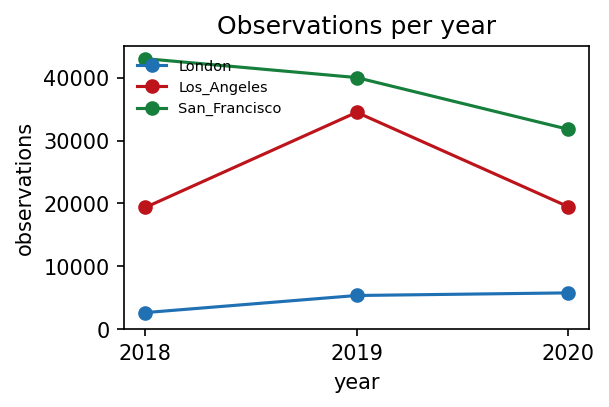

In [8]:
fig = plt.figure(figsize=(4,2.5))
for city, dfyears in dfs.items():
    x=[]; y=[];
    for year, df in dfyears.items():
        x.append(year)
        y.append(len(df))
    plt.plot(x, y, '-o', label=city, color=cities_colors[city][-1])
from matplotlib.ticker import MultipleLocator
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("year")
plt.ylabel("observations")
plt.title("Observations per year")
plt.legend(frameon=False, fontsize=7, loc='upper left')

plt.ylim(ymin=0)
plt.show()

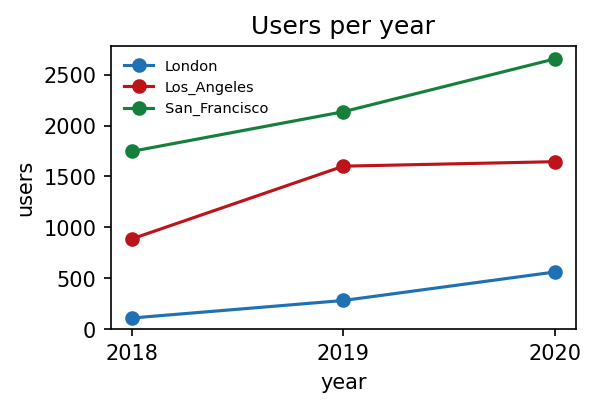

In [9]:
fig = plt.figure(figsize=(4,2.5))
for city, dfyears in dfs.items():
    x=[]; y=[];
    for year, df in dfyears.items():
        x.append(year)
        n_user = len(df['user_id'].unique())
        y.append(n_user)
    plt.plot(x, y, '-o', label=city, color=cities_colors[city][-1])
from matplotlib.ticker import MultipleLocator
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("year")
plt.ylabel("users")
plt.title("Users per year")
plt.legend(frameon=False, fontsize=7, loc='upper left')

plt.ylim(ymin=0)
plt.show()

# Observations by users

## Average observations per user

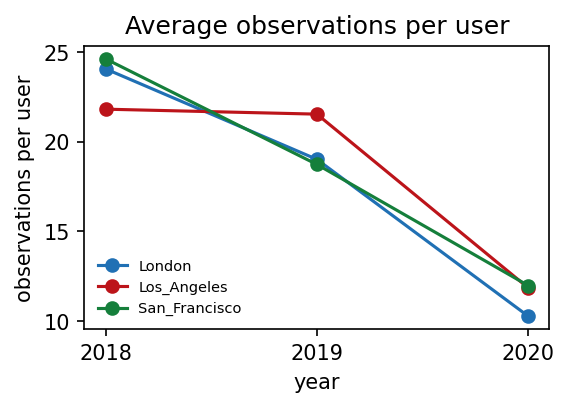

In [10]:
fig = plt.figure(figsize=(4,2.5))
for city, dfyears in dfs.items():
    x=[]; y=[];
    for year, df in dfyears.items():
        x.append(year)
        n_user = len(df['user_id'].unique())
        n_obs = len(df)
        y.append(n_obs/n_user)
    plt.plot(x, y, '-o', label=city, color=cities_colors[city][-1])
from matplotlib.ticker import MultipleLocator
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("year")
plt.ylabel("observations per user")
plt.title("Average observations per user")
plt.legend(frameon=False, fontsize=7, loc='lower left')

# plt.ylim(ymin=0)
plt.show()

## User distribution

In [11]:
def plot_histogram(a: np.array, xrange: tuple = None, logx=False, logy=False, nbins=10, ax=None, density=False, **kwargs):
    """ Plot a histogram with an optionally logarithmic x-axis """
    from scipy.stats import binned_statistic

    if ax is None:
        fig, ax = plt.subplot(1)
    if not xrange:
        xrange = [1, a.max()]

    if logx:
        bins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), nbins)
    else:
        bins = np.linspace(*xrange, nbins)
    counts, bin_edges = np.histogram(a, bins=bins)

    if density:
        counts = counts / np.sum(counts)

    ax.step(bin_edges[1:], counts, **kwargs)
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    return ax

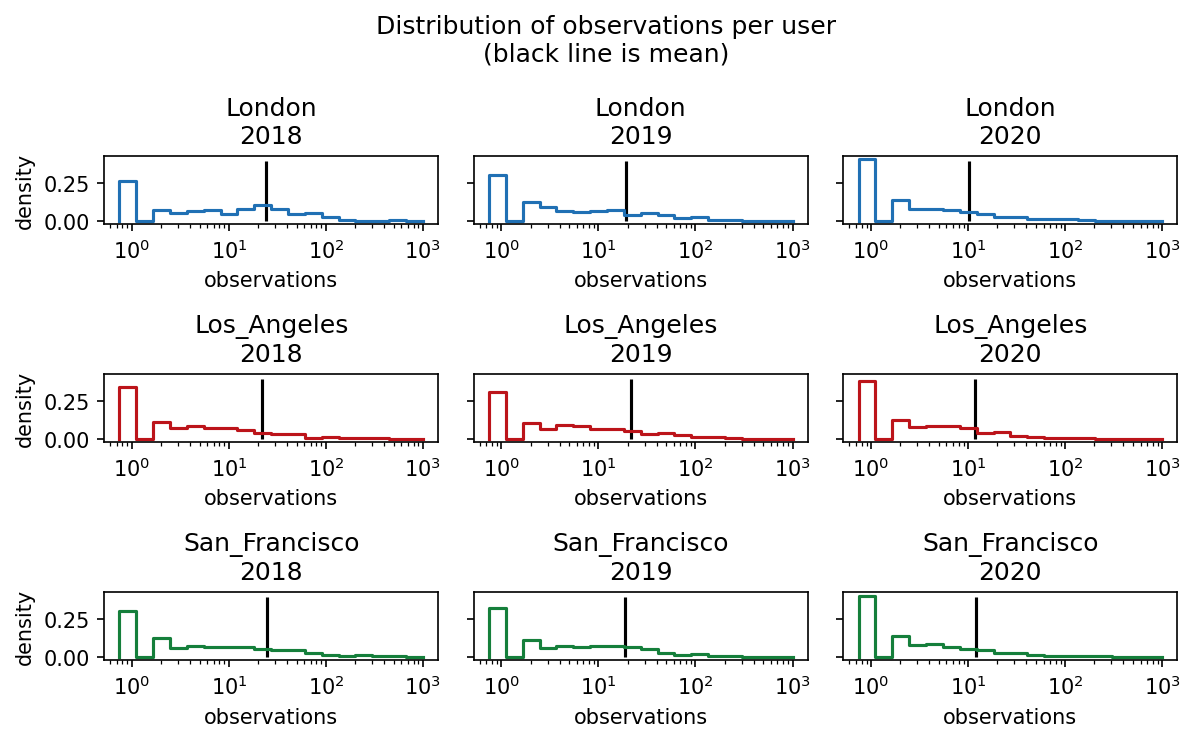

In [15]:
# fig, axes = plt.subplots(3,3, figsize=(8,5))
fig, axes = plt.subplots(3,3, figsize=(8,5), sharey=True)
for i, (city, dfyears) in enumerate(dfs.items()):
    for j, (year, df) in enumerate(dfyears.items()):
#         n_counts = pd.value_counts(df['user_id'])
        user_counts = df.groupby(by='user_id').count()['id']
        plot_histogram(user_counts, ax=axes[i][j], logx=True, nbins=20, xrange=(0.5,1000), color=cities_colors[city][-1], density=True)
#         axes[i][j].hist(n_counts, color=cities_colors[city][j])

        axes[i][j].vlines(np.mean(user_counts),0,0.4, color='k')
        axes[i][j].set_title(city + '\n{}'.format(year))
        axes[i][j].set_xlabel("observations")

axes[0][0].set_ylabel("density")
axes[1][0].set_ylabel("density")
axes[2][0].set_ylabel("density")
#axes[0][3].axis('off')
plt.suptitle("Distribution of observations per user\n(black line is mean)")
plt.tight_layout()
plt.show()

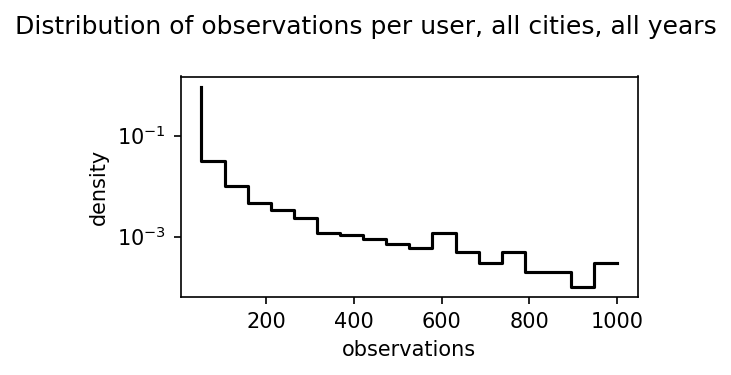

In [13]:
fig = plt.figure(figsize=(4.,2.5))
user_counts = dfall.groupby(by='user_id').count()['id']
# plot_histogram(user_counts, ax=plt.gca(),logx=True, nbins=20, xrange=(0.5,1000), color='k', density=True)
plot_histogram(user_counts, ax=plt.gca(),logx=False, logy=True, nbins=20, xrange=(0.0,1000), color='k', density=True)
plt.suptitle("Distribution of observations per user, all cities, all years")
plt.xlabel("observations")
plt.ylabel("density")

plt.tight_layout()
plt.show()